In [1]:
%matplotlib inline

In [2]:
from __future__ import absolute_import, print_function, division, unicode_literals

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import IPython.display as display

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import sklearn.model_selection as sk

import os, pathlib, math, datetime

In [3]:
# graphwiz path variable
os.environ["PATH"] += os.pathsep + "D:/Program Files (x86)/Graphwiz2.38/bin/"

# autotune constant
autotune = tf.data.experimental.AUTOTUNE

# seed
seed = 42069

In [4]:
# dataset path

path = "D:\\jupyter_notebook\\virtualenv_keras\\datasets\\"
dir_name = "iwildcam-2019-fgvc6"
data_dir = pathlib.Path(path + dir_name)

print("Data directory: ", data_dir)
print("Content: ", os.listdir(data_dir))

Data directory:  D:\jupyter_notebook\virtualenv_keras\datasets\iwildcam-2019-fgvc6
Content:  ['sample_submission.csv', 'test.csv', 'test_images', 'test_images.zip', 'train.csv', 'train_images', 'train_images.zip']


In [5]:
# set directory
train_dir = pathlib.Path(os.path.join(data_dir, "train_images"))
test_dir = pathlib.Path(os.path.join(data_dir, "test_images"))

csv_sample_submit = pathlib.Path(os.path.join(data_dir, "sample_submission.csv"))
csv_test = pathlib.Path(os.path.join(data_dir, "test.csv"))
csv_train = pathlib.Path(os.path.join(data_dir, "train.csv"))

In [8]:
data = pd.read_csv(csv_train)
data.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [22]:
statistics = data.groupby("category_id").count().reset_index()
statistics

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,0,131457,131457,131457,131457,131457,131457,131457,131457,131457,131457
1,1,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102
2,3,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398
3,4,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210
4,8,6938,6938,6938,6938,6938,6938,6938,6938,6938,6938
5,10,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
6,11,7209,7209,7209,7209,7209,7209,7209,7209,7209,7209
7,13,8623,8623,8623,8623,8623,8623,8623,8623,8623,8623
8,14,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361
9,16,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975


In [24]:
statistics["file_name"].describe()

count        14.000000
mean      14021.357143
std       33998.052265
min          33.000000
25%        2416.250000
50%        5367.000000
75%        7141.250000
max      131457.000000
Name: file_name, dtype: float64

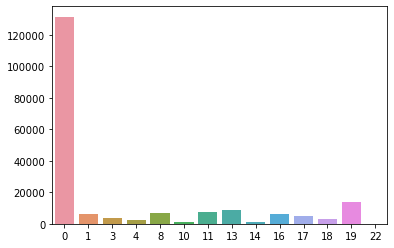

In [18]:
sns.barplot(statistics["category_id"].to_list(), statistics["file_name"].to_list())

In [35]:
data_random_drop = data.drop(data[data["category_id"] == 0].sample(frac=.9).index)

In [36]:
new_statistics = data_random_drop.groupby("category_id").count().reset_index()
new_statistics

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,0,13146,13146,13146,13146,13146,13146,13146,13146,13146,13146
1,1,6102,6102,6102,6102,6102,6102,6102,6102,6102,6102
2,3,3398,3398,3398,3398,3398,3398,3398,3398,3398,3398
3,4,2210,2210,2210,2210,2210,2210,2210,2210,2210,2210
4,8,6938,6938,6938,6938,6938,6938,6938,6938,6938,6938
5,10,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093
6,11,7209,7209,7209,7209,7209,7209,7209,7209,7209,7209
7,13,8623,8623,8623,8623,8623,8623,8623,8623,8623,8623
8,14,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361
9,16,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975


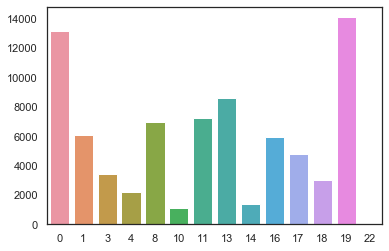

In [37]:
sns.barplot(new_statistics["category_id"].to_list(), new_statistics["file_name"].to_list())

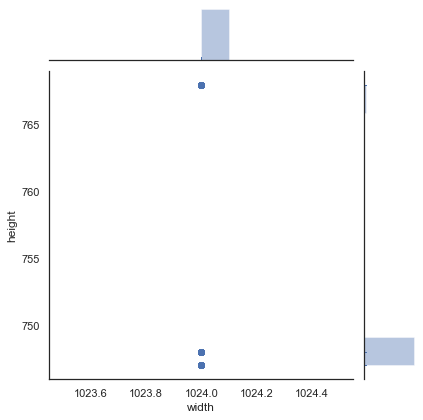

In [38]:
sns.set(style = "white", color_codes = True)
sns.jointplot(
   x = "width",
   y = "height",
   data = data_random_drop,
   marginal_kws = dict(bins = 10, rug = True)
)

In [19]:
filenames = list([
   os.path.abspath(train_dir) 
   + "\\" 
   + fname for fname in data["file_name"] 
   ])
labels = list(data["category_id"])

train_filenames, test_filenames, train_labels, test_labels = sk.train_test_split(
   filenames,
   labels,
   train_size = 0.8,
   random_state = seed
)

In [42]:
data_random_drop.groupby("width").count()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,height
width,,,,,,,,,,
1024,77988,77988,77988,77988,77988,77988,77988,77988,77988,77988


In [43]:
data_random_drop.groupby("height").count()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width
height,,,,,,,,,,
747,73329,73329,73329,73329,73329,73329,73329,73329,73329,73329
748,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444
768,3215,3215,3215,3215,3215,3215,3215,3215,3215,3215


In [58]:
class_names = new_statistics["category_id"].to_list()
class_names

[0, 1, 3, 4, 8, 10, 11, 13, 14, 16, 17, 18, 19, 22]

In [53]:
filenames = list([
   os.path.abspath(train_dir)
   + "\\"
   + fname for fname in data_random_drop["file_name"]
])

labels = data_random_drop["category_id"].to_list()

In [54]:
train_filenames, test_filenames, train_labels, test_labels = sk.train_test_split(
   filenames,
   labels,
   train_size = 0.8,
   random_state = seed
)

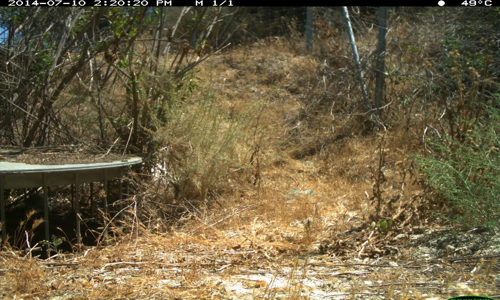

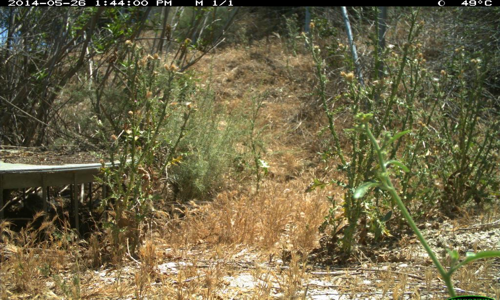

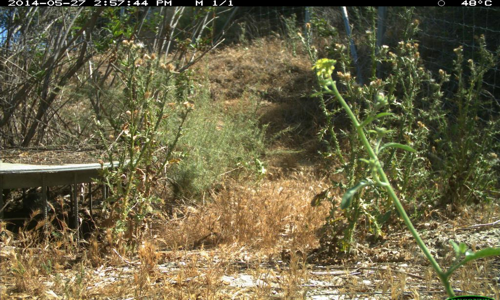

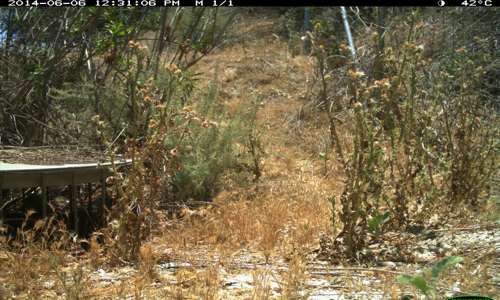

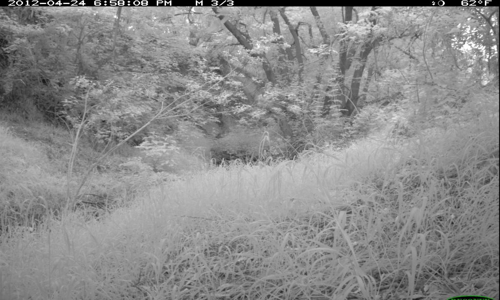

<Figure size 432x288 with 0 Axes>

In [47]:
sample = list(train_dir.glob("*"))

plt.figure()
for image_path in sample[:5]:
   display.display(Image.open(str(image_path)).resize((500, 300)))

In [55]:
train_data = tf.data.Dataset.from_tensor_slices(
   (tf.constant(train_filenames), tf.constant(train_labels))
)

test_data = tf.data.Dataset.from_tensor_slices(
   (tf.constant(test_filenames), tf.constant(test_labels))
)

In [56]:
batch_size = 10
img_width = 300
img_height = 300

def encode_label(label):
   return label == class_names

def decode_image(img):
   img = tf.image.decode_png(img, channels = 3)
   img = tf.image.convert_image_dtype(img, tf.float32)
   return tf.image.resize(img, [img_width, img_height])

def process_path(filename, label):
   label = encode_label(label)
   img = tf.io.read_file(filename)
   img = decode_image(img)
   return img, label

In [59]:
train_data = train_data.map(process_path, num_parallel_calls = autotune)
test_data = test_data.map(process_path, num_parallel_calls = autotune)

In [60]:
for image, label in train_data.take(1):
   print("Image shape: ", image.numpy().shape)
   print("Label", label.numpy())

Image shape:  (300, 300, 3)
Label [False False False False False False False False False False False False
  True False]


In [61]:
def prepare_for_training(dataset, cache = True, shuffle_buffer_size = 1000):
   if cache:
      if isinstance(cache, str):
         dataset = dataset.cache(cache)
      else:
         daaset = dataset.cache()
         
   dataset = dataset.shuffle(buffer_size = shuffle_buffer_size).repeat().batch(batch_size).prefetch(buffer_size = autotune)
   return dataset

In [62]:
prepared_train_data = prepare_for_training(train_data)
prepared_test_data = prepare_for_training(test_data)

In [69]:
model = Sequential([
   Conv2D(16, 3, padding = "same", activation = "relu", input_shape = (img_width, img_height, 3)),
   MaxPooling2D(),
   Dropout(0.2),
   Conv2D(32, 3, padding='same', activation='relu'),
   MaxPooling2D(),
   Dropout(0.2),
   Conv2D(64, 3, padding='same', activation='relu'),
   MaxPooling2D(),
   Dropout(0.2),
   Conv2D(128, 3, padding='same', activation='relu'),
   MaxPooling2D(),
   Dropout(0.2),
   Flatten(),
   Dense(1024, activation='relu'),
   Dense(14, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 150, 150, 16)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)       

In [71]:
history = model.fit(
   prepared_train_data,
   epochs = 20,
   steps_per_epoch = 100,
   validation_data = prepared_test_data,
   validation_steps = 100,
)

Train for 100 steps, validate for 100 steps
Epoch 1/20
100/100 [==============================] - 157s 2s/step - loss: 0.2809 - accuracy: 0.9254 - val_loss: 0.2321 - val_accuracy: 0.9286
Epoch 2/20
100/100 [==============================] - 103s 1s/step - loss: 0.2060 - accuracy: 0.9315 - val_loss: 0.2025 - val_accuracy: 0.9334
Epoch 3/20
100/100 [==============================] - 104s 1s/step - loss: 0.1840 - accuracy: 0.9379 - val_loss: 0.1859 - val_accuracy: 0.9378
Epoch 4/20
100/100 [==============================] - 115s 1s/step - loss: 0.1715 - accuracy: 0.9389 - val_loss: 0.1725 - val_accuracy: 0.9402
Epoch 5/20
100/100 [==============================] - 108s 1s/step - loss: 0.1686 - accuracy: 0.9408 - val_loss: 0.1755 - val_accuracy: 0.9417
Epoch 6/20
100/100 [==============================] - 107s 1s/step - loss: 0.1602 - accuracy: 0.9434 - val_loss: 0.1615 - val_accuracy: 0.9409
Epoch 7/20
100/100 [==============================] - 106s 1s/step - loss: 0.1528 - accuracy: 0.94

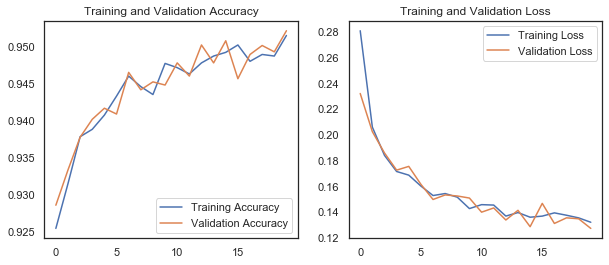

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [74]:
from sklearn.metrics import classification_report

image_batch, label_batch = next(iter(prepared_test_data))

y_pred = model.predict(image_batch, batch_size = 20, verbose=1)
y_pred_bool = np.argmax(label_batch, axis=1)

print(classification_report(label_batch.numpy().nonzero()[1], y_pred_bool))

10/10 [==============================] - 0s 37ms/sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [75]:
y_pred_bool

array([ 9,  2,  8,  9,  4,  0, 10,  7,  0, 12], dtype=int64)